In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For market basket analysis
from mlxtend.frequent_patterns import apriori, association_rules

# Import the data
data = pd.read_csv('data/session_data.csv')

# Display the first few rows of the data
data.head()

,session_id,product_name
0,000ed966131fcb96e0efc4ff2b716a3e,beetroot
1,000ed966131fcb96e0efc4ff2b716a3e,cucumber
2,0013eab657eaf2d82d7f1e13023d95c2,onion
3,0013eab657eaf2d82d7f1e13023d95c2,long shelf life milk
4,0013fabde1e543dd541be925266aadbc,dates


In [2]:
# Basic EDA
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345152 entries, 0 to 345151
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   session_id    345152 non-null  object
 1   product_name  345152 non-null  object
dtypes: object(2)
memory usage: 5.3+ MB
None
                              session_id product_name
count                             345152       345152
unique                            165335          396
top     27d86d946e6ea6d022f12211d61f8ac7        onion
freq                                   9        31196


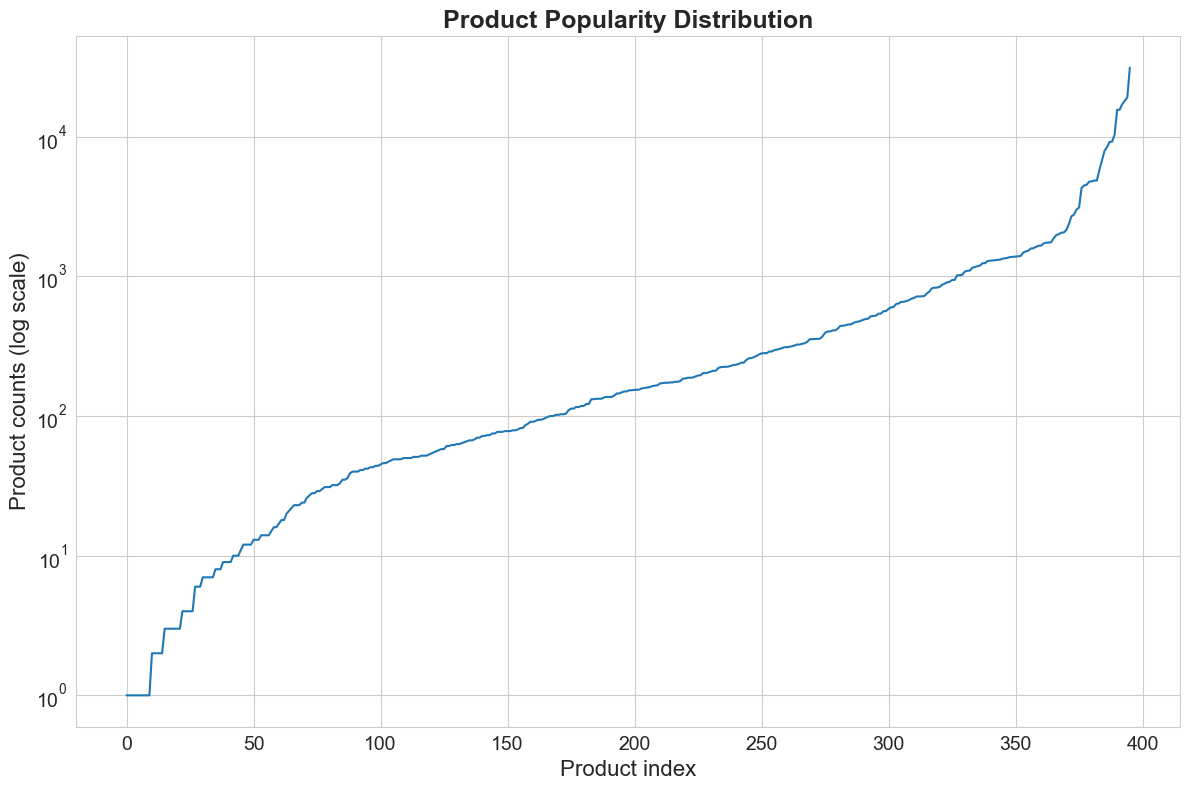

In [3]:
# Plotting the frequency of each product
product_counts = data.groupby(['product_name']).count()['session_id'].values

# Set up the plot
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

# Plot the product counts
plt.semilogy(sorted(product_counts))
plt.title("Product Popularity Distribution", fontsize=18, fontweight='bold')
plt.ylabel("Product counts (log scale)", fontsize=16);
plt.xlabel("Product index", fontsize=16);

plt.tight_layout()

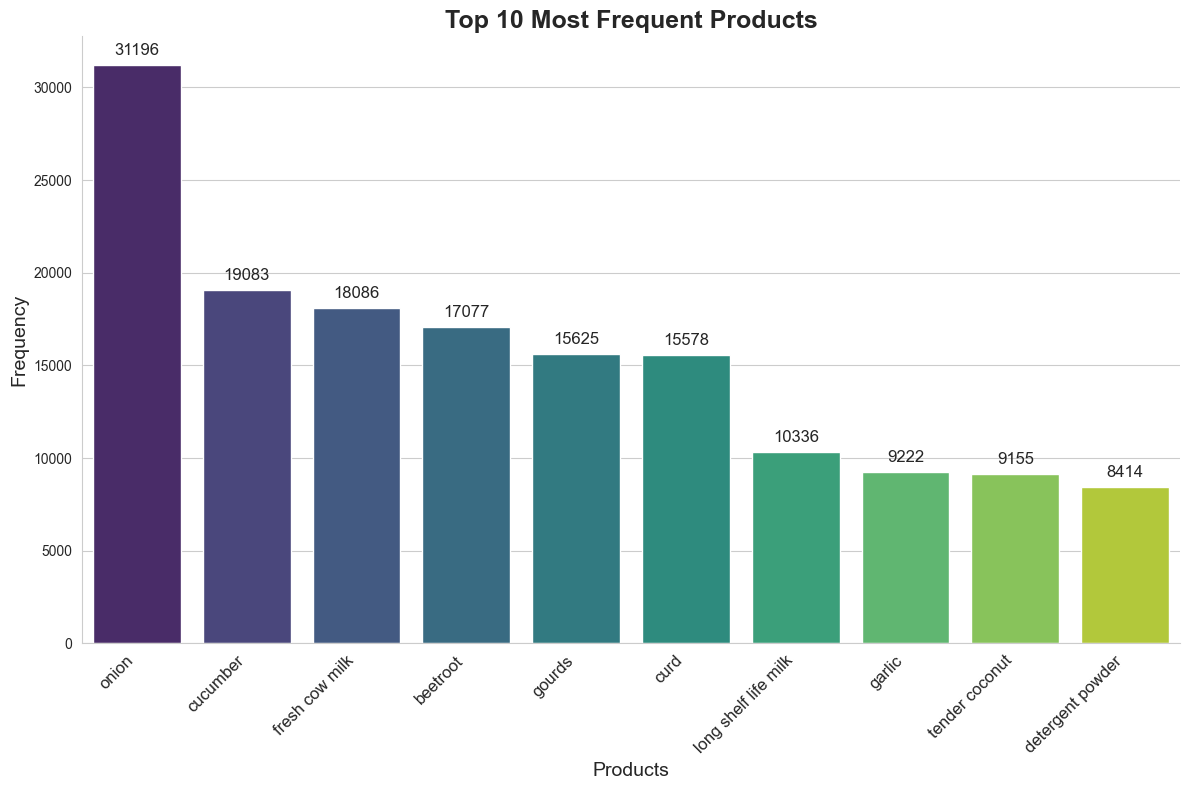

In [4]:
# Plotting the frequency of the top 10 products
product_counts = data['product_name'].value_counts().head(10)

# Set up the plot
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

# Create the bar plot
bar_plot = sns.barplot(x=product_counts.index, y=product_counts.values, palette="viridis")

# Add labels to the bars
for i in bar_plot.containers:
    bar_plot.bar_label(i, fmt='%d', padding=5, fontsize=12)

# Set plot labels and title
plt.xlabel('Products', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Top 10 Most Frequent Products', fontsize=18, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12)

# Customize the plot further (e.g., removing the top and right spines)
sns.despine()

# Show the plot
plt.tight_layout()
plt.show()

In [5]:
# Market Basket Analysis (Predictive)
basket = (data.groupby(['session_id', 'product_name'])['product_name']
          .count().unstack().reset_index().fillna(0)
          .set_index('session_id'))

# Convert the data into a one-hot encoded format
def encode_units(x):
    return 0 if x <= 0 else 1

basket_sets = basket.applymap(encode_units)

# Apply the Apriori algorithm
frequent_itemsets = apriori(basket_sets, min_support=0.01, use_colnames=True)

# Generate the rules
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.0)
rules = rules.sort_values(['confidence', 'lift'], ascending=[False, False])
rules.head()

c:\Python311\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
3,(beetroot),(cucumber),0.103287,0.115420,0.051985,0.503309,4.360662,0.040064,1.780944,0.859447
25,(long shelf life milk),(onion),0.062515,0.188684,0.030647,0.490228,2.598150,0.018851,1.591529,0.656129
2,(cucumber),(beetroot),0.115420,0.103287,0.051985,0.450401,4.360662,0.040064,1.631576,0.871235
26,(tender coconut),(onion),0.055372,0.188684,0.021883,0.395194,2.094479,0.011435,1.341449,0.553186
16,(watermelon),(cucumber),0.029389,0.115420,0.011462,0.389998,3.378940,0.008070,1.450126,0.725367
